In [75]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [76]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

In [77]:
#load model
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

model.eval()

YOLOv5  2022-12-25 Python-3.10.8 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

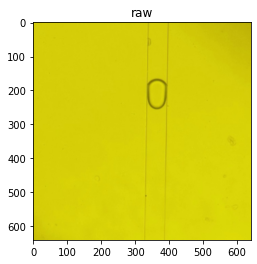

In [78]:
#read input image
img = cv2.imread('data/image/20009.jpg')
img_raw = img.copy()

#size
# x,y,h,w = 580,310,640,640
# img = img[y:y+h, x:x+w]
previewImg('raw', img)
#read ouput from model
results = model(img)

In [79]:
results.xyxy

[tensor([], size=(0, 6))]

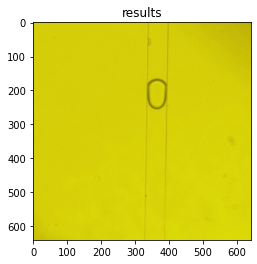

In [80]:
%matplotlib inline 
img = np.squeeze(results.render())
img_old = img.copy()
# img_raw = img.copy()
# cv2.imwrite('test_data/result_yolo.jpg', img)
previewImg('results', np.squeeze(results.render()))

In [81]:
results.xyxy

[tensor([], size=(0, 6))]

In [82]:
# !python yolov5/detect.py --weights yolov5/runs/train/exp9/weights/best.pt --source data/image/20009.jpg